In [3]:
import numpy as np
import sys
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct, ConstantKernel,
                                              Exponentiation)
import warnings #for deprecated decorator
import functools #for deprecated decorator
import inspect #for deprecated decorator

from time import time #for Timer
from datetime import datetime #for Timer
import os, glob #for clearVtkOutputDirectory

from matplotlib import pyplot as plt

In [4]:
def GPSample(control_points, step_points, lower, upper, seed = 1, kernelID = 0, numSamples = 1):
    '''Gaussian Process supperle generator
     
    Args:
        tlist (array of dim 1): time points at which you want the values
        tchar (float): characteristic time of the GP
        upper (float): the upperlitude of the proces. 
        seed (int): random seed
        kernelID (int): specify the kernel to use in the GP (range from 0 to 4)
        numSamples (int): specifies the number of sequences in the output
        cont_level (int): continuity level at origin. If it is 0 (for C0), the 
            value of the GP is close to zero at the origin. If cont_level is 1 
            (for C1), the value and the derivative of the GP are close to zero
            at the origin. The values can't be guaranteed to be exactly zero for
            numerical reasons.
    Returns:
        N by numSupperles array, where N is the length of tlist, and each column 
            represents the values of a gaussian process.
    
    '''
    ndtchar = 1
    kernels = [upper**2 * RBF(length_scale=ndtchar, length_scale_bounds=(1e-1, 10.0)),
               upper**2 * RationalQuadratic(length_scale=ndtchar, alpha=0.1),
               upper**2 * ExpSineSquared(length_scale=ndtchar, periodicity=3.0,
                                    length_scale_bounds=(0.1, 10.0),
                                    periodicity_bounds=(1.0, 10.0)),
               ConstantKernel(upper**2, (0.01, 10.0))
                   * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
               upper**2 * Matern(length_scale=ndtchar, length_scale_bounds=(1e-1, 10.0),
                            nu=1.5),
               ConstantKernel(constant_value=upper**2,constant_value_bounds=(1e-3, 1e3)) \
                * RBF(length_scale=1, length_scale_bounds=(1e-3, 1e3)),
               Exponentiation( upper**2 * RBF(length_scale=1, length_scale_bounds=(1e-10, 1e10)), exponent=2),
               Exponentiation( upper**2 * RationalQuadratic(length_scale=1, alpha=0.1), exponent=2)
            ]
    ker = kernels[kernelID]
    gp = GaussianProcessRegressor(kernel=ker, alpha=1e-10,optimizer=None,n_restarts_optimizer=10)
    len_cp = len(control_points)
    control_values = np.random.uniform(lower, upper, len_cp)
    control_values[0] = 0
    #print(control_points.reshape(-1, 1))
    #print(control_values.reshape(-1, 1))
    
    #fitting the Gaussian process so that it passes through the origin
    gp.fit(control_points.reshape(-1, 1), control_values.reshape(-1, 1))
    print(gp.sample_y(step_points.reshape(-1, 1), numSamples).shape)
    seqs = gp.sample_y(step_points.reshape(-1, 1), numSamples).reshape(-1, 1)
    
    a = plt.plot(step_points, seqs, label='pred', marker='s')
    a = plt.plot(control_points, control_values, label='control', marker="*")
#     plt.legend()
    return gp.sample_y(step_points.reshape(-1, 1), numSamples).reshape(-1, 1)


###corelation length?

In [5]:
tmax = 20 # total time
N_timesteps = 300 # number of timesteps
N_cp = 20 # number of control points

d_cp = tmax / N_cp
control_points = np.arange(0, tmax, d_cp)
print(control_points)
d_step = tmax / N_timesteps
step_points = np.arange(0, tmax, d_step) #times at which we are making getting the values

# epsilon
lower_bound =0
upper_bound = 2e-2

# theta
amp_theta = 3.141592/12

e_max = 2 * upper_bound

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


In [ ]:
import numpy
for aa in range(100):

    seed = 1 #a random seed
    kernelID = 6 #kernel type. It's specified in the function definition

    num_seqs = 1
    numPerSeq = 1
    e1_seqs = np.zeros([N_timesteps, num_seqs * numPerSeq])
    e2_seqs = np.zeros([N_timesteps, num_seqs * numPerSeq]) 
    e3_seqs = np.zeros([N_timesteps, num_seqs * numPerSeq]) 
    theta_seqs = np.zeros([N_timesteps, num_seqs * numPerSeq])

    for i in range(num_seqs):
        e1_seqs[0 : N_timesteps, i * numPerSeq:(i+1) * numPerSeq] = GPSample(control_points, step_points, lower_bound, upper_bound, seed, kernelID, numPerSeq)
        seed = seed + 1
        e2_seqs[0 : N_timesteps, i * numPerSeq:(i+1) * numPerSeq] = GPSample(control_points, step_points, lower_bound, upper_bound, seed, kernelID, numPerSeq)
        seed = seed + 1
        e3_seqs[0 : N_timesteps, i * numPerSeq:(i+1) * numPerSeq] = GPSample(control_points, step_points, lower_bound, upper_bound, seed, kernelID, numPerSeq)
        seed = seed + 1
    
    
    numpy.savetxt("e1_seqs_"+str(aa)+".csv", e1_seqs, delimiter = ",")
    numpy.savetxt("e2_seqs_"+str(aa)+".csv", e2_seqs, delimiter = ",")
    numpy.savetxt("e3_seqs_"+str(aa)+".csv", e3_seqs, delimiter = ",")


(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(300, 1)
(

In [ ]:
seed = 1 #a random seed
kernelID = 6 #kernel type. It's specified in the function definition

num_seqs = 1
numPerSeq = 1
e1_seqs = np.zeros([N_timesteps, num_seqs * numPerSeq])
e2_seqs = np.zeros([N_timesteps, num_seqs * numPerSeq]) 
e3_seqs = np.zeros([N_timesteps, num_seqs * numPerSeq]) 
theta_seqs = np.zeros([N_timesteps, num_seqs * numPerSeq])

for i in range(num_seqs):
    e1_seqs[0 : N_timesteps, i * numPerSeq:(i+1) * numPerSeq] = GPSample(control_points, step_points, lower_bound, upper_bound, seed, kernelID, numPerSeq)
    seed = seed + 1
    e2_seqs[0 : N_timesteps, i * numPerSeq:(i+1) * numPerSeq] = GPSample(control_points, step_points, lower_bound, upper_bound, seed, kernelID, numPerSeq)
    seed = seed + 1
    e3_seqs[0 : N_timesteps, i * numPerSeq:(i+1) * numPerSeq] = GPSample(control_points, step_points, lower_bound, upper_bound, seed, kernelID, numPerSeq)
    seed = seed + 1

In [11]:

#print(e1_seqs)
print(e2_seqs.shape)
# print(theta_seqs.shape)

(500, 1)


In [12]:
import numpy
numpy.savetxt("e1_seqs_2.csv", e1_seqs,
              delimiter = ",")

In [13]:
numpy.savetxt("e2_seqs_2.csv", e2_seqs,
              delimiter = ",")

In [14]:
numpy.savetxt("e3_seqs_2.csv", e3_seqs,
              delimiter = ",")

In [ ]:
a = plt.plot(e1_seqs, marker="*")

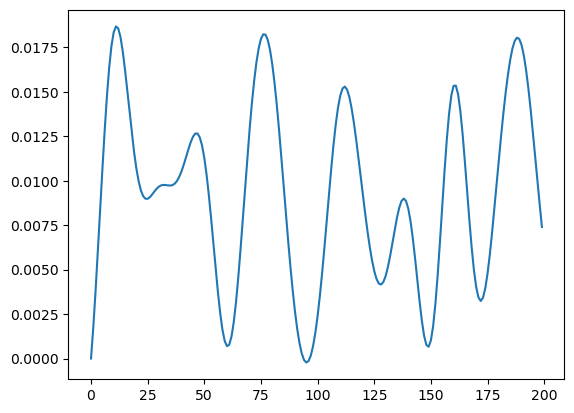

In [28]:
a = plt.plot(e2_seqs)

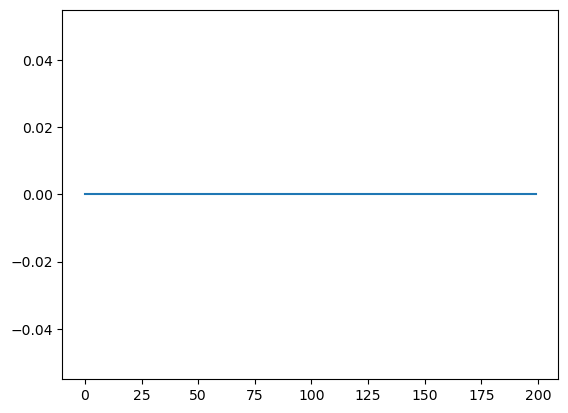

In [29]:
a = plt.plot(theta_seqs)

IndexError: index 1 is out of bounds for axis 1 with size 1

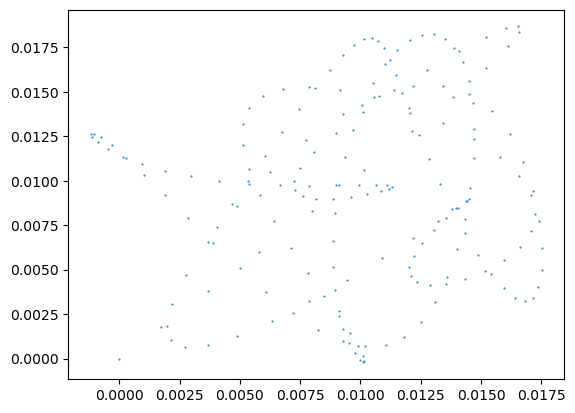

In [30]:
plt.scatter(e1_seqs[:,0],e2_seqs[:,0], marker='.',s=1)
plt.scatter(e1_seqs[:,1],e2_seqs[:,1], marker='.',s=1)
plt.scatter(e1_seqs[:,2],e2_seqs[:,2], marker='.',s=1)
plt.scatter(e1_seqs[:,3],e2_seqs[:,3], marker='.',s=1)
plt.scatter(e1_seqs[:,4],e2_seqs[:,4], marker='.',s=1)
plt.scatter(e1_seqs[:,5],e2_seqs[:,5], marker='.',s=1)
plt.scatter(e1_seqs[:,6],e2_seqs[:,6], marker='.',s=1)
plt.scatter(e1_seqs[:,7],e2_seqs[:,7], marker='.',s=1)
plt.scatter(e1_seqs[:,8],e2_seqs[:,8], marker='.',s=1)
plt.scatter(e1_seqs[:,9],e2_seqs[:,9], marker='.',s=1)
plt.xlim(-0.03, 0.03) 
plt.ylim(-0.03, 0.03)
plt.xlabel('$\epsilon_1$')
plt.ylabel('$\epsilon_2$')
plt.axis('equal')

In [10]:
e1=np.reshape(e1_seqs,-1,order='F')
e2=np.reshape(e2_seqs,-1,order='F')
theta=np.reshape(theta_seqs,-1,order='F')

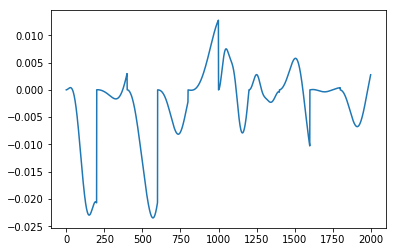

In [11]:
a=plt.plot(e1)

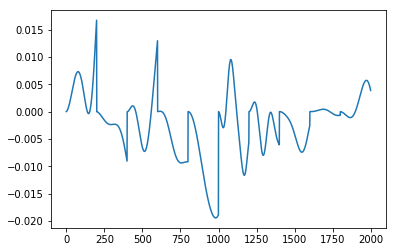

In [12]:
a=plt.plot(e2)

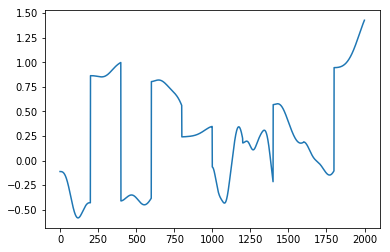

In [13]:
a=plt.plot(theta)

/usr/local/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


(-0.04, 0.04, -0.04, 0.04)

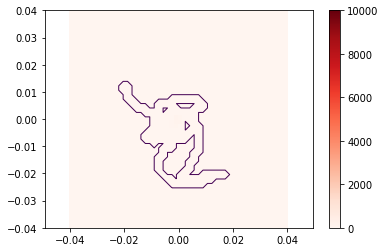

In [14]:
counts,ybins,xbins,image = plt.hist2d(e1,e2,50, range =[[-e_max, e_max], [-e_max, e_max]],cmap=plt.cm.Reds,vmin=0,vmax=10000)
plt.colorbar()
plt.contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],levels=[0, 2000, 4000, 6000, 8000, 10000],linewidths=1)
plt.axis('equal')


(-0.030195472121868443,
 0.019490277402480893,
 -0.02887231974232369,
 0.02614207571825356)

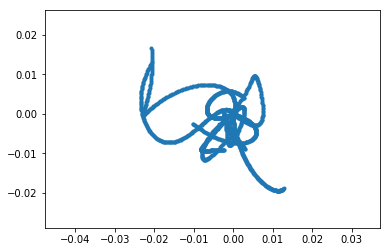

In [15]:
plt.scatter(e1,e2,marker='.')
plt.axis('equal')

In [15]:
e_11 = (e1-e2)*np.cos(theta)*np.cos(theta)+e2
e_12 = np.sin(theta)*np.cos(theta)*(e1-e2)
e_22 = (-e1+e2)*np.cos(theta)*np.cos(theta)+e1

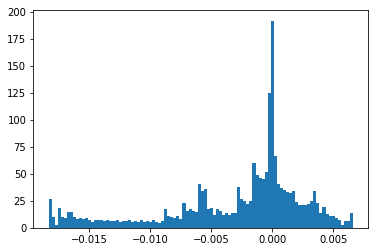

In [16]:
a,b,c = plt.hist(e_11,100)

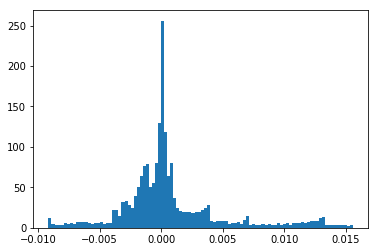

In [17]:
a,b,c = plt.hist(e_12,100)

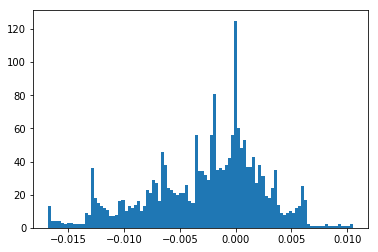

In [18]:
a,b,c = plt.hist(e_22,100)

In [19]:
e_1 = 0.5*e_22+0.5*e_11+0.5*np.sqrt(e_11*e_11-2*e_11*e_22+4*e_12*e_12+e_22*e_22)
e_2 = 0.5*e_22+0.5*e_11-0.5*np.sqrt(e_11*e_11-2*e_11*e_22+4*e_12*e_12+e_22*e_22)

(-0.04, 0.04, -0.04, 0.04)

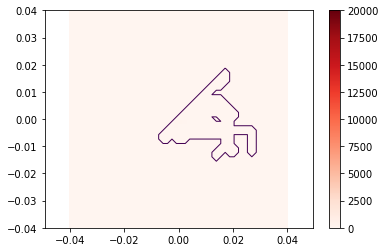

In [20]:
counts,ybins,xbins,image = plt.hist2d(e_1,e_2,50, range =[[-e_max, e_max], [-e_max, e_max]],cmap=plt.cm.Reds,vmin=0,vmax=20000)
plt.colorbar()
plt.contour(counts,extent=[-xbins.min(),-xbins.max(),-ybins.min(),-ybins.max()],levels=[0, 4000, 8000, 12000, 16000, 20000],linewidths=1)
plt.axis('equal')

In [21]:
plt.hist2d(e1_seqs)

TypeError: hist2d() missing 1 required positional argument: 'y'

In [ ]:
a=np.arange(n_timesteps)

In [ ]:
a.shape

In [ ]:
e1_seqs.shape

In [ ]:
b=np.array([a,a])

In [ ]:
b.shape

In [ ]:
c=np.array([a,b])

In [ ]:
c.shape